# Economic Indicators on the Real Estate Market

By: Alwin Nackeeran and Ajay Patel

## Introduction

The Real Estate Market is a dynamic and ever-changing arena characterized by periods of highs and lows. In recent years, the United States has seen unprecedented increases in real estate values. The reasons behind this surge are widely debated: some attribute it to inflation, others to overpopulation, and still others to fluctuating mortgage rates... What really is the cause of this recent upturn in the Real Estate Market.

In this Analysis we will aim to answer 2 questions.
1. How much do Economic indicators really impact the Real Estate Market?
2. Which Economic indicators have the most significant impact on the Real Estate Market ?

Understanding the impact of economic indicators on the real estate market is crucial for several reasons. Firstly, it helps investors, policymakers, and stakeholders make informed decisions based on data-driven insights. Secondly, identifying the most influential economic indicators can guide strategic planning and policy formulation to stabilize and enhance market performance. Lastly, this knowledge empowers individuals and businesses to anticipate market trends and make proactive decisions, thereby lowering risks and capitalizing on opportunities in the real estate sector.

## Data Curation

For our analysis we are utilizing 12 different datasets. All data are from reputable services offered by the government such as FRED(Federal Reserve Bank of St.Louis) or the BLS(U.S Burea of Labor Satistics)

3 for Real Estate Indicators
https://fred.stlouisfed.org/series/CSUSHPINSA - Case Shiller Price Index
https://fred.stlouisfed.org/series/MSPUS - Median Sales Price of House
https://fred.stlouisfed.org/series/ASPUS - Mean Sales Price of House

8 for the economic indicators
https://fred.stlouisfed.org/series/FEDFUNDS - Federal Funds Rate
https://fred.stlouisfed.org/series/GDP - GDP
https://fred.stlouisfed.org/series/MORTGAGE30US - 30 year mortgage rate
https://fred.stlouisfed.org/series/SPPOPGROWUSA - Population Growth rate
https://fred.stlouisfed.org/series/UNRATE - unemployment rate
https://www.bls.gov/cpi/ - Consumer Price Index CPI
https://fred.stlouisfed.org/series/FPCPITOTLZGUSA - Inflation Rates
https://fred.stlouisfed.org/series/MAFAINUSA646N - Mean Family Income






Our project will be carried with the use of Jupyter Notebooks and the python coding language. Jupyter Notebooks is an incredibly powerful data analytics/science tool. Learn more about it and try it for yourself here : https://jupyter.org/

The aim of this project is to show you the workflow as well as the pipeline of data science.

1. Data Collection
2. Data Processing
3. Exploratory Analysis & Data viz
4. Analysis Hypothesis testing, & Machine learning
5. Insight & Policy Decision  


 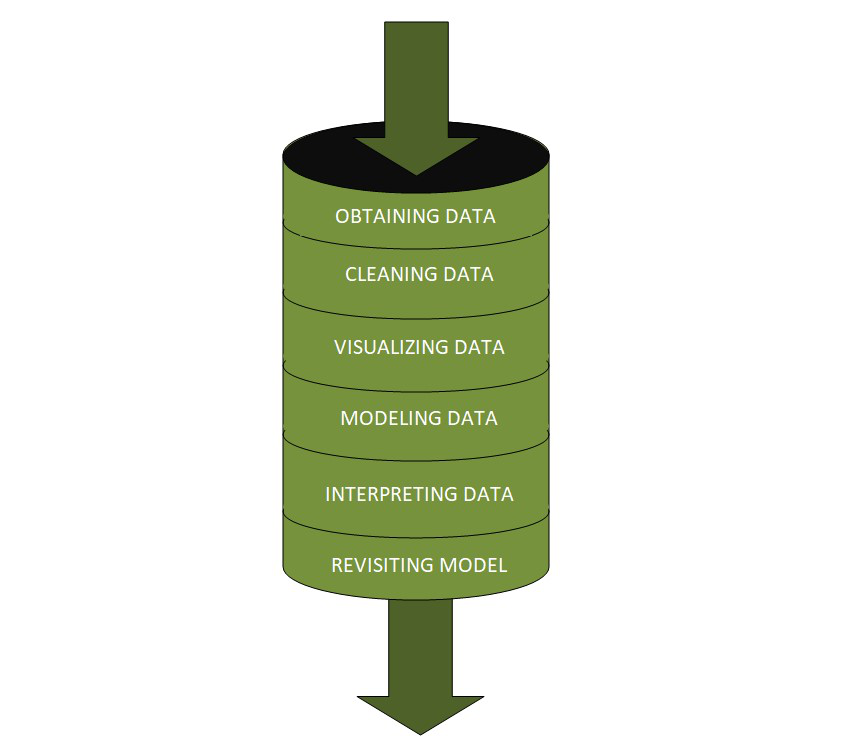


Were done with data collection, Our next step is Data Proccesing

## Data Processing

In [73]:
import pandas as pd
from scipy import stats

The idea of the next few sectiions is as such. We have 8 different datasets that are contributing to the economic indicators dataframe we want to create.

We also have 3 datasets in respect to the real estate market and prices.

We will combine them as well as do some standardization. For example, standardzing dates and date formats, as well as missing and extra values. Follow along to see the nuances and additional standardization practices that we will have to carry out

# Data Preprocessing

In [74]:

# First we Load the our Economic indicator datasets into pandas
gdp_data = pd.read_csv('GDP.csv')
fedfunds_data = pd.read_csv('FEDFUNDS.csv')
mean_family_income_data = pd.read_csv('mean family income.csv')
median_cpi_data = pd.read_csv('median cpi.csv')
mortgage30us_data = pd.read_csv('MORTGAGE30US.csv')
population_growth_data = pd.read_csv('SPPOPGROWUSA.csv')
unemployment_data = pd.read_csv('UNRATE.csv')
inflation_data = pd.read_csv('US_inflation_rates.csv')


# Lets display the first few rows of each dataset to understand their structure
gdp_data.head(),fedfunds_data.head(), mean_family_income_data.head(), median_cpi_data.head(), mortgage30us_data.head(), population_growth_data.head(), unemployment_data.head(), inflation_data.head()


(         DATE      GDP
 0  1947-01-01  243.164
 1  1947-04-01  245.968
 2  1947-07-01  249.585
 3  1947-10-01  259.745
 4  1948-01-01  265.742,
          DATE  FEDFUNDS
 0  1954-07-01      0.80
 1  1954-08-01      1.22
 2  1954-09-01      1.07
 3  1954-10-01      0.85
 4  1954-11-01      0.83,
          DATE  MAFAINUSA646N
 0  1953-01-01           4706
 1  1954-01-01           4684
 2  1955-01-01           4962
 3  1956-01-01           5341
 4  1957-01-01           5443,
          DATE  MEDCPIM158SFRBCLE
 0  1983-01-01           5.014653
 1  1983-02-01           4.952545
 2  1983-03-01           3.612261
 3  1983-04-01           4.828054
 4  1983-05-01           3.767326,
          DATE  MORTGAGE30US
 0  1971-04-02          7.33
 1  1971-04-09          7.31
 2  1971-04-16          7.31
 3  1971-04-23          7.31
 4  1971-04-30          7.29,
          DATE  SPPOPGROWUSA
 0  1961-01-01      1.657730
 1  1962-01-01      1.537997
 2  1963-01-01      1.439165
 3  1964-01-01      1.38904

First we import the 8 data files regarding economic indicators using pandas to read the csv's(comma seperate values files),

Then to get a feel for the data we will print out just the heads or the first few rows of each dataset to understand their structure

Upon inspecting the structures of the csv's we can see that all datasets contain a 'Date' column and present their respective data. Each of these date columns involve a different range of years. In order to merge the economic indicators we must have a consistent date format.

#Standardization and Parsing


In [75]:
# Next lets just rename all the columns to ensure consistency and to help understanding
inflation_data.rename(columns={'date': 'DATE', 'value': 'Inflation_Rate'}, inplace=True)
fedfunds_data.rename(columns={'date': 'DATE', 'value': 'FEDFUNDS'}, inplace=True)
mean_family_income_data.rename(columns={'date': 'DATE', 'value': 'Mean_Family_Income'}, inplace=True)
median_cpi_data.rename(columns={'date': 'DATE', 'value': 'Median_CPI'}, inplace=True)
mortgage30us_data.rename(columns={'date': 'DATE', 'value': '30_Year_Mortgage_Rate'}, inplace=True)

# Parse dates to ensure they are datetime objects
gdp_data['DATE'] = pd.to_datetime(gdp_data['DATE'])
population_growth_data['DATE'] = pd.to_datetime(population_growth_data['DATE'])
unemployment_data['DATE'] = pd.to_datetime(unemployment_data['DATE'])
inflation_data['DATE'] = pd.to_datetime(inflation_data['DATE'])
fedfunds_data['DATE'] = pd.to_datetime(fedfunds_data['DATE'])
mean_family_income_data['DATE'] = pd.to_datetime(mean_family_income_data['DATE'])
median_cpi_data['DATE'] = pd.to_datetime(median_cpi_data['DATE'])
mortgage30us_data['DATE'] = pd.to_datetime(mortgage30us_data['DATE'])




Now the 'Date' columns are standardized across all dataframes and in the same 'datetime' format. In addition, the value columns have been renamed for easier understanding.  

*Datetime standardization* is important for the time series data for future analysis and merging of data

What does it mean to parse dates into datetime objects you may ask ?
This is simply ensuring that date and time information are converted from string format into a 'datetime' object. These objects allow for easy manipulation and functionality with methods and functions that you will see later on down the line

Next lets work on making sure all datasets cover the same range of years

In [76]:
# Gather a List of all the DataFrames
dataframes = [gdp_data, population_growth_data, unemployment_data, inflation_data, fedfunds_data,
              mean_family_income_data, median_cpi_data, mortgage30us_data]

#lists to store the minimum and maximum years for each DataFrame
min_years = []
max_years = []

# Loop through each DataFrame to find the minimum and maximum years
for df in dataframes:
    # Extract the year from the DATE column
    years = df['DATE'].dt.year
    # Append the minimum and maximum years to the lists
    min_years.append(years.min())
    max_years.append(years.max())

# Find the common range of years
common_min_year = max(min_years)
common_max_year = min(max_years)

print(f"Common range of years where all datasets have data: {common_min_year} to {common_max_year}")

Common range of years where all datasets have data: 1983 to 2022


The code above essentially tells us what dates are shared between all datasets. Now we know that with this newfound range of years, all of our datasets will have values. This will help us avoid null,blank, or NaN values... for the most part

Now we want to standardize this date range that we found across all the datasets

In [77]:
# Define the common date range
common_min_year = '1987-01-01'
common_max_year = '2022-12-31'

# Filter datasets for the common date range
gdp_data = gdp_data[(gdp_data['DATE'] >= common_min_year) & (gdp_data['DATE'] <= common_max_year)]
population_growth_data = population_growth_data[(population_growth_data['DATE'] >= common_min_year) & (population_growth_data['DATE'] <= common_max_year)]
unemployment_data = unemployment_data[(unemployment_data['DATE'] >= common_min_year) & (unemployment_data['DATE'] <= common_max_year)]
inflation_data = inflation_data[(inflation_data['DATE'] >= common_min_year) & (inflation_data['DATE'] <= common_max_year)]
fedfunds_data = fedfunds_data[(fedfunds_data['DATE'] >= common_min_year) & (fedfunds_data['DATE'] <= common_max_year)]
mean_family_income_data = mean_family_income_data[(mean_family_income_data['DATE'] >= common_min_year) & (mean_family_income_data['DATE'] <= common_max_year)]
median_cpi_data = median_cpi_data[(median_cpi_data['DATE'] >= common_min_year) & (median_cpi_data['DATE'] <= common_max_year)]
mortgage30us_data = mortgage30us_data[(mortgage30us_data['DATE'] >= common_min_year) & (mortgage30us_data['DATE'] <= common_max_year)]

# Set the DATE column as the index
gdp_data.set_index('DATE', inplace=True)
population_growth_data.set_index('DATE', inplace=True)
unemployment_data.set_index('DATE', inplace=True)
inflation_data.set_index('DATE', inplace=True)
fedfunds_data.set_index('DATE', inplace=True)
mean_family_income_data.set_index('DATE', inplace=True)
median_cpi_data.set_index('DATE', inplace=True)
mortgage30us_data.set_index('DATE', inplace=True)



At this point, the ranges have been standardized across all ecnomic indicator datasets, but a quick look at the data will show us that in this span of years that we have chosen,  the amount of datapoints are not equal. How can we standardize this so that datapoints fall under the same date for future graphing and analysis, and there is an equal amount of data amongst all data?

Well, looking at our data we can see that every data set follows a sort of format like *year-month-date*. The only difference being that one dataset may have multiple data values for any particular month, and the other might have just one. To solve this we will aggregate the data by month, and take the mean of all values presented within a month if there are more than 1. This is done with the *'resample('M')* method that changes the frequency of the time series to monthly intervals

In [78]:
# Aggregate by month, mean adjusts in case there are more than 1 data point present per month
gdp_data = gdp_data.resample('M').mean()
population_growth_data = population_growth_data.resample('M').mean()
unemployment_data = unemployment_data.resample('M').mean()
inflation_data = inflation_data.resample('M').mean()
fedfunds_data = fedfunds_data.resample('M').mean()
mean_family_income_data = mean_family_income_data.resample('M').mean()
median_cpi_data = median_cpi_data.resample('M').mean()
mortgage30us_data = mortgage30us_data.resample('M').mean()

# Reset the index to have DATE as a column again and format as YYYY-MM
gdp_data.reset_index(inplace=True)
population_growth_data.reset_index(inplace=True)
unemployment_data.reset_index(inplace=True)
inflation_data.reset_index(inplace=True)
fedfunds_data.reset_index(inplace=True)
mean_family_income_data.reset_index(inplace=True)
median_cpi_data.reset_index(inplace=True)
mortgage30us_data.reset_index(inplace=True)

# Convert DATE to YYYY-MM format
gdp_data['DATE'] = gdp_data['DATE'].dt.to_period('M').dt.to_timestamp()
population_growth_data['DATE'] = population_growth_data['DATE'].dt.to_period('M').dt.to_timestamp()
unemployment_data['DATE'] = unemployment_data['DATE'].dt.to_period('M').dt.to_timestamp()
inflation_data['DATE'] = inflation_data['DATE'].dt.to_period('M').dt.to_timestamp()
fedfunds_data['DATE'] = fedfunds_data['DATE'].dt.to_period('M').dt.to_timestamp()
mean_family_income_data['DATE'] = mean_family_income_data['DATE'].dt.to_period('M').dt.to_timestamp()
median_cpi_data['DATE'] = median_cpi_data['DATE'].dt.to_period('M').dt.to_timestamp()
mortgage30us_data['DATE'] = mortgage30us_data['DATE'].dt.to_period('M').dt.to_timestamp()


Now lets merge all the economic indicators and take a look

In [80]:
# Merge the datasets on the monthly date index
combined_df = gdp_data.copy()
combined_df = combined_df.merge(unemployment_data, on='DATE', how='outer')
combined_df = combined_df.merge(inflation_data, on='DATE', how='outer')
combined_df = combined_df.merge(fedfunds_data, on='DATE', how='outer')
combined_df = combined_df.merge(mean_family_income_data, on='DATE', how='outer')
combined_df = combined_df.merge(median_cpi_data, on='DATE', how='outer')
combined_df = combined_df.merge(mortgage30us_data, on='DATE', how='outer')
combined_df = combined_df.merge(population_growth_data, on='DATE', how='outer')

#rename columns for enhanced readability
combined_df.rename(columns={
    'GDP': 'Gross Domestic Product',
    'UNRATE': 'Unemployment Rate',
    'Inflation_Rate': 'Inflation Rate',
    'FEDFUNDS': 'Federal Funds Rate',
    'MAFAINUSA646N': 'Mean Family Income',
    'MEDCPIM158SFRBCLE': 'Median Consumer Price Index',
    'MORTGAGE30US': '30 Year Mortgage Rate',
    'SPPOPGROWUSA': 'Population Growth Rate'
}, inplace=True)


# Display the entire DataFrame
print(combined_df.head())



        DATE  Gross Domestic Product  Unemployment Rate  Inflation Rate  \
0 1987-01-01                4722.156                6.6           111.4   
1 1987-02-01                     NaN                6.6           111.8   
2 1987-03-01                     NaN                6.6           112.2   
3 1987-04-01                4806.160                6.3           112.7   
4 1987-05-01                     NaN                6.3           113.0   

   Federal Funds Rate  Mean Family Income  Median Consumer Price Index  \
0                6.43             36880.0                     5.358298   
1                6.10                 NaN                     3.337758   
2                6.13                 NaN                     3.798986   
3                6.37                 NaN                     4.732866   
4                6.85                 NaN                     4.506360   

   30 Year Mortgage Rate  Population Growth Rate  
0                 9.2040                0.893829  
1 

Upon viewing our combined dataframe, we can see some alarming things,that we may have initially missed. Three columns(GDP, Mean family income, and Populatio growth), have only annual values, or less frequent monthly values. This means that in order to standardize the data to monthly values we must find a way to disperse/standardize our annual values to a monthly format.

The approach we will be using is called interpolation.Interpolation is a method/strategy of estimating unknown values that fall between known values. We can use this to create monthly estimates from our yearly data by filling in the gaps. There are multiple types of interpolation and we will be using 2 of them.

### Interpolation strategies

Gross Domestic Product(GDP):
Method used: Linear Interpolation
Reason: GDP typically changes in a relatively linear manner over time with a high level of aggregation

Mean Family Income:
Method used: Cubic Spline interpolation  
Reason : Non-Linear, so linear would not smoothly capture the differenr rates of change in the data

Population Growth Rate:
Method : Cubic Spline Interpolation
Reason: Population growth might have had more nuanced and less linear changes due to external factors such as seasonal patterns

To learn more about cubic spline interpolation and to see how the values are calculated, check out this website : https://www.geeksforgeeks.org/cubic-spline-interpolation/

In [81]:
# Interpolate yearly data using designated methods
combined_df['Mean Family Income'] = combined_df['Mean Family Income'].interpolate(method='cubic')
combined_df['Gross Domestic Product'] = combined_df['Gross Domestic Product'].interpolate(method='linear')
combined_df['Population Growth Rate'] = combined_df['Population Growth Rate'].interpolate(method='cubic')
print(combined_df.head())
combined_df.to_csv('combined_dataframe.csv', index=False)

        DATE  Gross Domestic Product  Unemployment Rate  Inflation Rate  \
0 1987-01-01             4722.156000                6.6           111.4   
1 1987-02-01             4750.157333                6.6           111.8   
2 1987-03-01             4778.158667                6.6           112.2   
3 1987-04-01             4806.160000                6.3           112.7   
4 1987-05-01             4832.291667                6.3           113.0   

   Federal Funds Rate  Mean Family Income  Median Consumer Price Index  \
0                6.43        36880.000000                     5.358298   
1                6.10        36879.416353                     3.337758   
2                6.13        36913.061049                     3.798986   
3                6.37        36978.561056                     4.732866   
4                6.85        37073.543344                     4.506360   

   30 Year Mortgage Rate  Population Growth Rate  
0                 9.2040                0.893829  
1 

Looks good, now we have a full dataframe without NaN or void values. This will help us in further analysis and with standardizing frequency and presence of data

Now lets move on to the real estate datasets

In [82]:
# Load the real estate datasets
mean_sales_price_data = pd.read_csv('mean sales price of houses.csv')
case_shiller_index_data = pd.read_csv('CSUSHPINSA.csv')
median_sales_price_data = pd.read_csv('median sale of houe.csv')

# Display the first few rows of each dataset to understand their structure
mean_sales_price_data.head(), case_shiller_index_data.head(), median_sales_price_data.head()


(         DATE    ASPUS
 0  1963-01-01  19300.0
 1  1963-04-01  19400.0
 2  1963-07-01  19200.0
 3  1963-10-01  19600.0
 4  1964-01-01  19600.0,
          DATE  CSUSHPINSA
 0  1987-01-01      63.735
 1  1987-02-01      64.135
 2  1987-03-01      64.470
 3  1987-04-01      64.973
 4  1987-05-01      65.547,
          DATE    MSPUS
 0  1963-01-01  17800.0
 1  1963-04-01  18000.0
 2  1963-07-01  17900.0
 3  1963-10-01  18500.0
 4  1964-01-01  18500.0)

The data seems to follow a similar format to the economic indicators, so lets carry through with the same steps.Lets Standardize the date column

In [83]:
# Rename columns to ensure consistency
mean_sales_price_data.rename(columns={'date': 'DATE', 'value': 'Mean_Sales_Price'}, inplace=True)
case_shiller_index_data.rename(columns={'date': 'DATE', 'value': 'CaseShiller_Index'}, inplace=True)
median_sales_price_data.rename(columns={'date': 'DATE', 'value': 'Median_Sales_Price'}, inplace=True)

# Parse dates to ensure they are datetime objects
mean_sales_price_data['DATE'] = pd.to_datetime(mean_sales_price_data['DATE'])
case_shiller_index_data['DATE'] = pd.to_datetime(case_shiller_index_data['DATE'])
median_sales_price_data['DATE'] = pd.to_datetime(median_sales_price_data['DATE'])

# Define the date range
start_date = '1987-01-01'
end_date = '2022-12-31'

# Filter datasets for the date range 1983 to 2012
mean_sales_price_data = mean_sales_price_data[(mean_sales_price_data['DATE'] >= start_date) & (mean_sales_price_data['DATE'] <= end_date)]
case_shiller_index_data = case_shiller_index_data[(case_shiller_index_data['DATE'] >= start_date) & (case_shiller_index_data['DATE'] <= end_date)]
median_sales_price_data = median_sales_price_data[(median_sales_price_data['DATE'] >= start_date) & (median_sales_price_data['DATE'] <= end_date)]

# Set the DATE column as the index
mean_sales_price_data.set_index('DATE', inplace=True)
case_shiller_index_data.set_index('DATE', inplace=True)
median_sales_price_data.set_index('DATE', inplace=True)


Next we have to account for the difference in data distribution between months. We will use the ffill technique this .

Why ffill and not interpolation here ? ffill works by propogating the last data point to the next one. This is useful for filling in missing values, and can be preffered for simplicity over inteprolation. as the missing values are only within a span of 2-3 months in this case as opposed to the annual disparity found in the economic indicators

In [84]:
#Resample to monthly frequency
mean_sales_price_data = mean_sales_price_data.resample('M').ffill()
case_shiller_index_data = case_shiller_index_data.resample('M').ffill()
median_sales_price_data = median_sales_price_data.resample('M').ffill()

# Reset the index to have DATE as a column again and avoid unwanted columns
mean_sales_price_data.reset_index(inplace=True)
case_shiller_index_data.reset_index(inplace=True)
median_sales_price_data.reset_index(inplace=True)

# Convert DATE to YYYY-MM format
mean_sales_price_data['DATE'] = mean_sales_price_data['DATE'].dt.to_period('M').dt.to_timestamp()
case_shiller_index_data['DATE'] = case_shiller_index_data['DATE'].dt.to_period('M').dt.to_timestamp()
median_sales_price_data['DATE'] = median_sales_price_data['DATE'].dt.to_period('M').dt.to_timestamp()

# Merge the real estate datasets on the monthly date index
real_estate_df = mean_sales_price_data.copy()
real_estate_df = real_estate_df.merge(case_shiller_index_data, on='DATE', how='outer')
real_estate_df = real_estate_df.merge(median_sales_price_data, on='DATE', how='outer')

#rename columns for enhanced readability
real_estate_df.rename(columns={
    ' ASPUS': 'Mean Sales',
    'CaseShiller_Index': 'Case Shiller Index',
    'Median_Sales_Price': 'Median Sales'
}, inplace=True)

print(real_estate_df.head())

        DATE     ASPUS  CSUSHPINSA     MSPUS
0 1987-01-01  120800.0      63.735   97900.0
1 1987-02-01  120800.0      64.135   97900.0
2 1987-03-01  120800.0      64.470   97900.0
3 1987-04-01  126100.0      64.973  103400.0
4 1987-05-01  126100.0      65.547  103400.0


Our real estate data looks good! Lets now move on to create a combined dataframe, which combines both the real estate data as well as the economic indicators. With this we will be able to conduct exploratory data analysis

### Descriptive Statistics


In [85]:
# Merge the combined DataFrame (economic factors) with the real estate DataFrame on the DATE column
full_df = pd.merge(combined_df, real_estate_df, on='DATE', how='outer')

# Display the first few rows of the combined DataFrame
print("Combined DataFrame:")
print(full_df.head())



Combined DataFrame:
        DATE  Gross Domestic Product  Unemployment Rate  Inflation Rate  \
0 1987-01-01             4722.156000                6.6           111.4   
1 1987-02-01             4750.157333                6.6           111.8   
2 1987-03-01             4778.158667                6.6           112.2   
3 1987-04-01             4806.160000                6.3           112.7   
4 1987-05-01             4832.291667                6.3           113.0   

   Federal Funds Rate  Mean Family Income  Median Consumer Price Index  \
0                6.43        36880.000000                     5.358298   
1                6.10        36879.416353                     3.337758   
2                6.13        36913.061049                     3.798986   
3                6.37        36978.561056                     4.732866   
4                6.85        37073.543344                     4.506360   

   30 Year Mortgage Rate  Population Growth Rate     ASPUS  CSUSHPINSA  \
0         

Now that we have all of our data in one place, ,lets check out the table. Inspecting the format and layout ensures that all data processing in previous steps carried out correctly, and that the merged dataset is accurately represented.

Conducting some summary statistics is also important to get a feel for each point of data.

Lastly we will do a box plot. This box plot will aim to show us the presence of outliers in the dataset.

Shape of the full DataFrame: (432, 12)
        DATE  Gross Domestic Product  Unemployment Rate  Inflation Rate  \
0 1987-01-01             4722.156000                6.6           111.4   
1 1987-02-01             4750.157333                6.6           111.8   
2 1987-03-01             4778.158667                6.6           112.2   
3 1987-04-01             4806.160000                6.3           112.7   
4 1987-05-01             4832.291667                6.3           113.0   

   Federal Funds Rate  Mean Family Income  Median Consumer Price Index  \
0                6.43        36880.000000                     5.358298   
1                6.10        36879.416353                     3.337758   
2                6.13        36913.061049                     3.798986   
3                6.37        36978.561056                     4.732866   
4                6.85        37073.543344                     4.506360   

   30 Year Mortgage Rate  Population Growth Rate     ASPUS  CSUSH

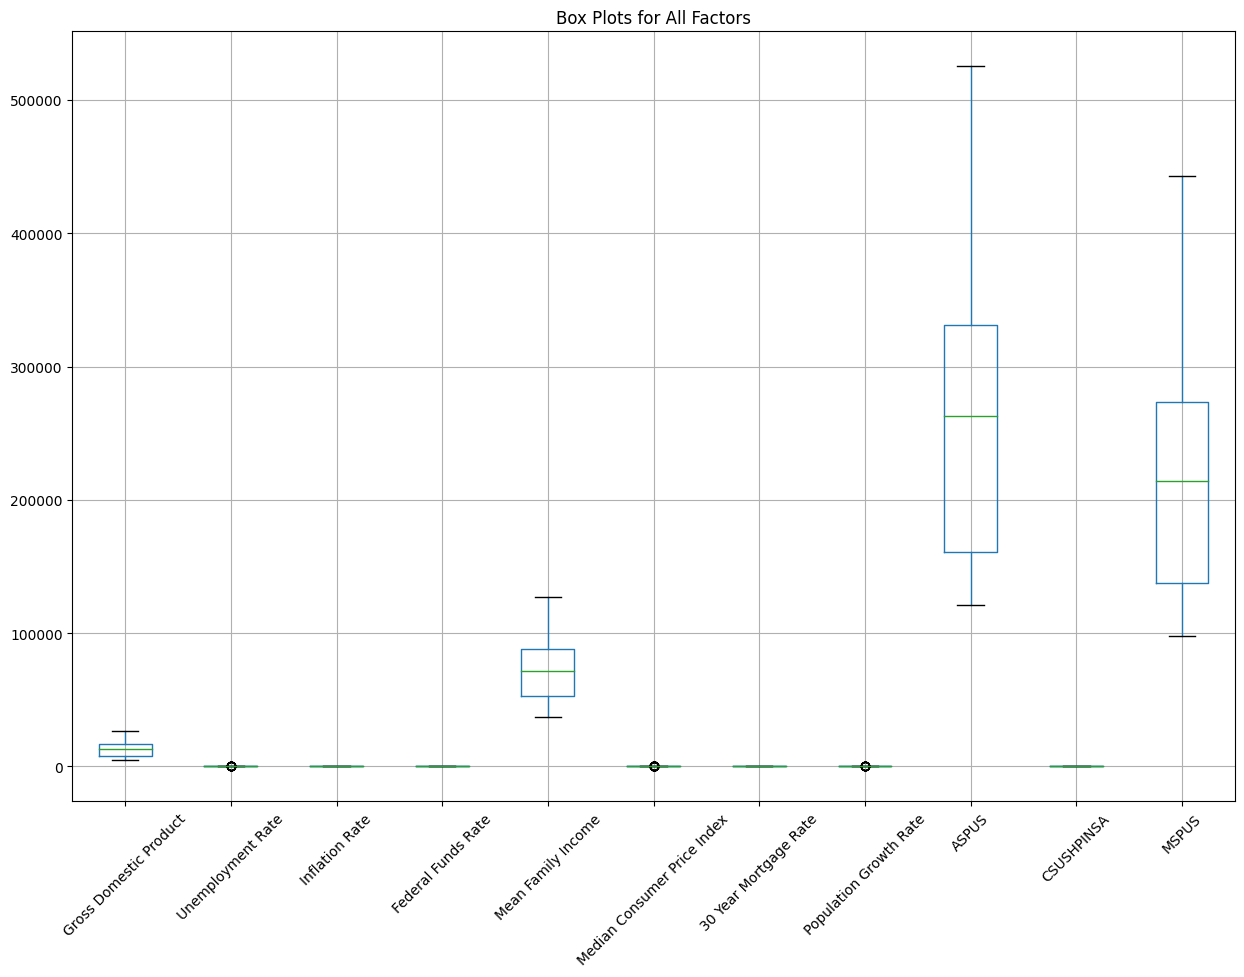

In [86]:
# Check the shape of the DataFrame
print("Shape of the full DataFrame:", full_df.shape)

# Display the first few rows of the DataFrame
print(full_df.head())
# Generate summary statistics
summary_stats_full = full_df.describe()
print(summary_stats_full)

# Visualize potential outliers using box plots
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
full_df.boxplot(rot=45)
plt.title("Box Plots for All Factors")
plt.show()


From this box and whisker plot, we are able to see how the 3 real estate indicators have a much larger variability, as well as from the whiskers, we can see that outliers tend to be greater, rather than lower price wise

Now that all of our data is ready to be analysed further and we have a good idea of how our data looks and presents itself, lets move on to the next step of our process.

## Exploratory Data Analysis

First we are going to take a look at how one of our economic indicators compare to one of our real estate indicators through a scatter plot, as well as calculation of a correlation coefficient

Correlation between GDP and Median Sales Price: 0.9873564182314432


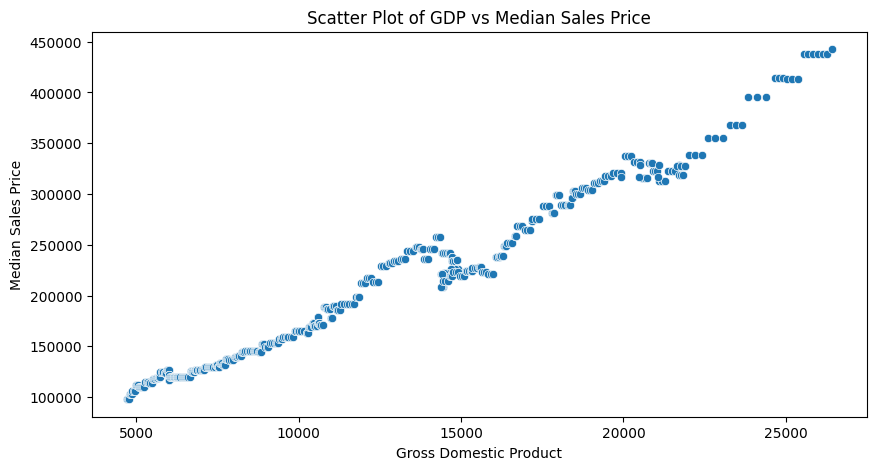

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation coefficient
gdp_corr_median_sales = full_df['Gross Domestic Product'].corr(full_df['MSPUS'])
print(f"Correlation between GDP and Median Sales Price: {gdp_corr_median_sales}")

# Scatter plot to visualize the correlation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Gross Domestic Product', y='MSPUS', data=full_df)
plt.title("Scatter Plot of GDP vs Median Sales Price")
plt.xlabel('Gross Domestic Product')
plt.ylabel('Median Sales Price')
plt.show()





### Finding 1: Relationship between GDP and Median Sales price




*Correlation Analysis:*
Correlation Coefficient: The Pearson correlation coefficient measures the strength and direction of the linear relationship between two variables.Where values closer to 1 or -1 indicate a strong relationship, and values closer to 0 indicate a weak relationship.

*Scatter Plot:*
Positive Trend: The points on the scatter plot form an upward trend, indicating a positive correlation between GDP and Median Sales Price. As GDP increases, the Median Sales Price of houses also tends to increase.

The analysis shows a strong positive correlation between GDP and the Median Sales Price of houses. Specifically:

Positive Correlation: The Pearson correlation coefficient is close to 1, indicating a strong positive relationship. This means that as GDP grows, the Median Sales Price of houses also increases.Further supported by the clear upward trend visible in the scatter plot.


To look further into the impact of an economic indicator we are going to visual the relationships between all the economic indicators and all the real estate factors.

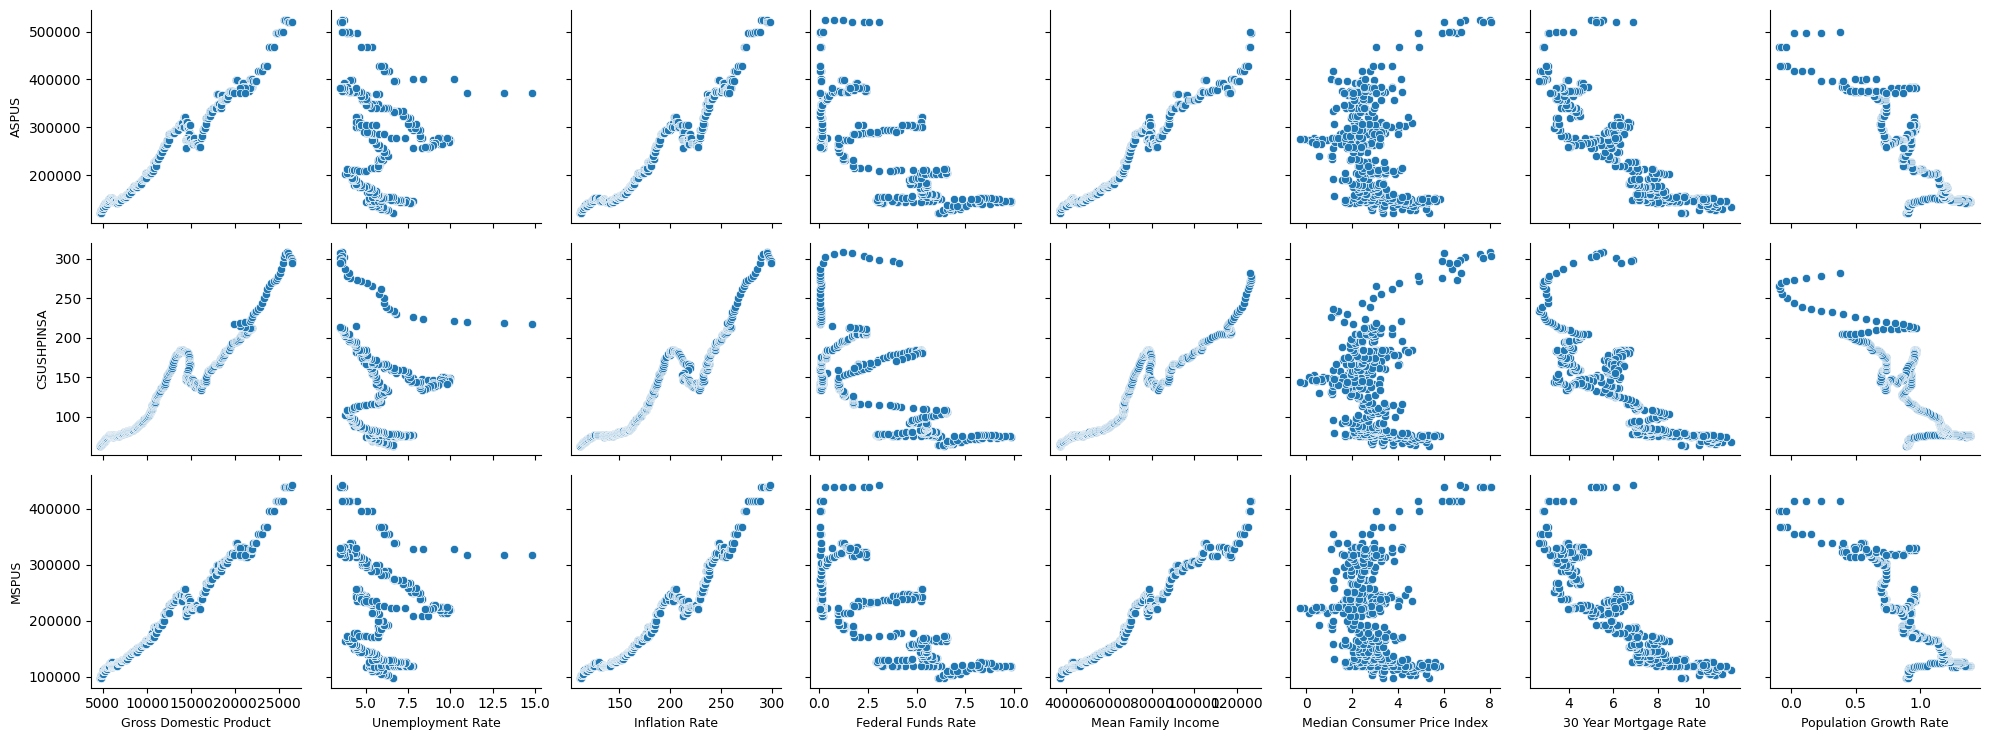

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define the lists of economic and real estate indicators
economic_indicators = ['Gross Domestic Product', 'Unemployment Rate', 'Inflation Rate', 'Federal Funds Rate', 'Mean Family Income', 'Median Consumer Price Index', '30 Year Mortgage Rate', 'Population Growth Rate']
real_estate_indicators = ['ASPUS', 'CSUSHPINSA', 'MSPUS']

# Create a PairGrid on the relationships between economic and real estate indicators
pair_vars = economic_indicators + real_estate_indicators
g = sns.PairGrid(full_df[pair_vars],
                 x_vars=economic_indicators,
                 y_vars=real_estate_indicators)

# Map the scatter plots to the grid
g.map(sns.scatterplot)

# Add titles and labels
for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=9)
    ax.set_xlabel(ax.get_xlabel(), fontsize=9)
    ax.set_ylabel(ax.get_ylabel(), fontsize=9)
plt.tight_layout()
plt.show()


## Finding 2 : all indicator correlation

At first glance a couple of things stand out to us. First are the strong positive correlations:

GDP: Strong positive Correlation with all Real estate values

Inflation Rate: Strong positive correlation with all real estate values

Mean Family income: Strong positive correlation with all real estate values

Negative / complex correlations but not as strong as the positive ones:
- Unemployment Rate
- Federal Funds Rate
- Median Consumer Price index
- 30 year mortgage rate
- Population Growth rate

Lets confirm the observations we made after looking at the grid of graphs above. To confirm the presence or lack thereof of strong correlations lets make a correlation matrix.

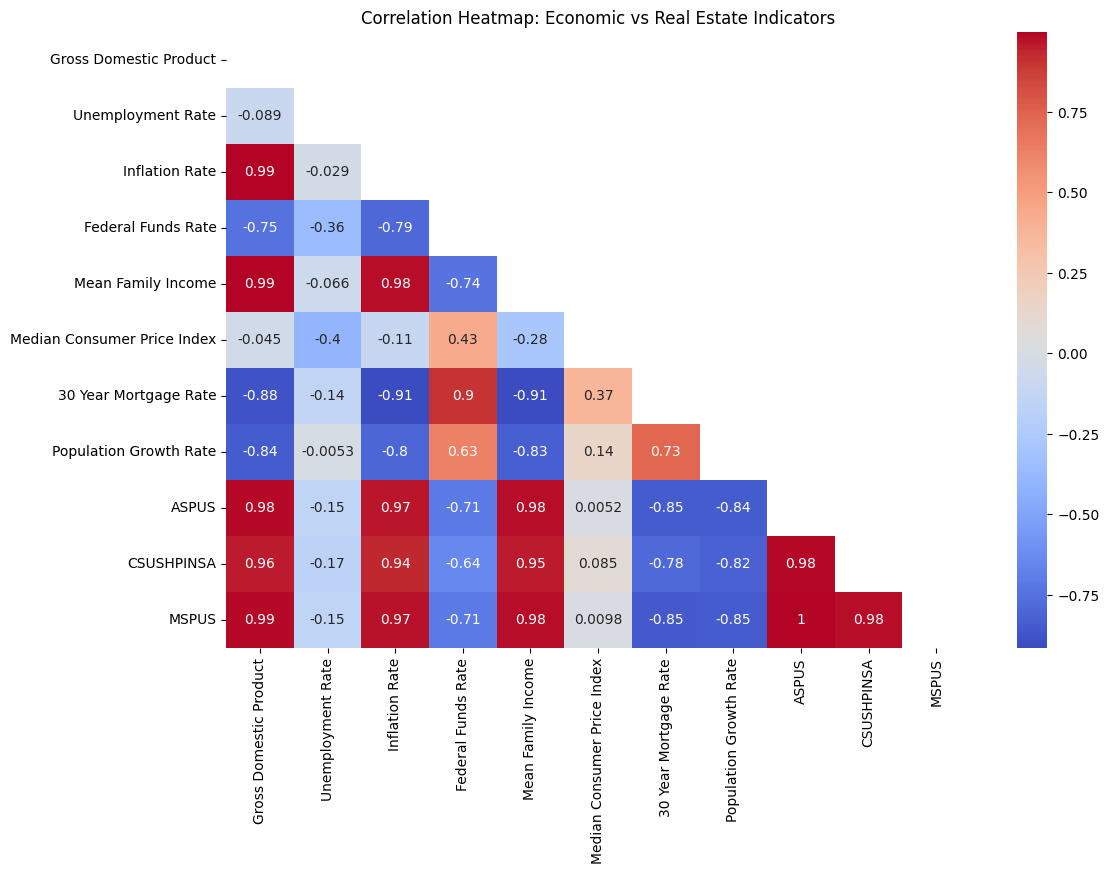

In [ ]:
# Define the lists of economic and real estate indicators
economic_indicators = ['Gross Domestic Product', 'Unemployment Rate', 'Inflation Rate', 'Federal Funds Rate', 'Mean Family Income', 'Median Consumer Price Index', '30 Year Mortgage Rate', 'Population Growth Rate']
real_estate_indicators = ['ASPUS', 'CSUSHPINSA', 'MSPUS']

# Combine the lists to select the relevant columns
selected_columns = economic_indicators + real_estate_indicators

# Extract the relevant columns from the DataFrame
selected_df = full_df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Create a mask to display only the economic indicators against real estate indicators
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask,
            xticklabels=selected_columns, yticklabels=selected_columns)
plt.title('Correlation Heatmap: Economic vs Real Estate Indicators')
plt.show()


## Finding 3 : Correlation Matrix

The heatmap clearly shows that GDP and Mean Family Income are strongly positively correlated with housing prices, indicating their significant impact on the real estate market.
Conversely, the Federal Funds Rate and 30 Year Mortgage Rate show strong negative correlations with housing prices, suggesting their crucial roles in influencing the real estate market.

How to read a correlation matrix and how it works ? Check it out here : https://www.questionpro.com/blog/correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a%20square%20matrix%20showing%20the%20correlation,in%20multivariate%20analysis%20and%20statistics.

Lets reflect on a specific aspect that we have seen so far. Lets take for example, how 30 year mortgage rates had a moderately high negative correlation with all real estate indicators. Let us perform a T-test and perform a box plot, to show us 2 things. The T -Test will show us if theres a significant difference between mortgage rates in the two different periods. The box plot will present us with a visual confirmation of T-test results.

T-test results: t-statistic = -27.102204282770057, p-value = 4.547794910455833e-95


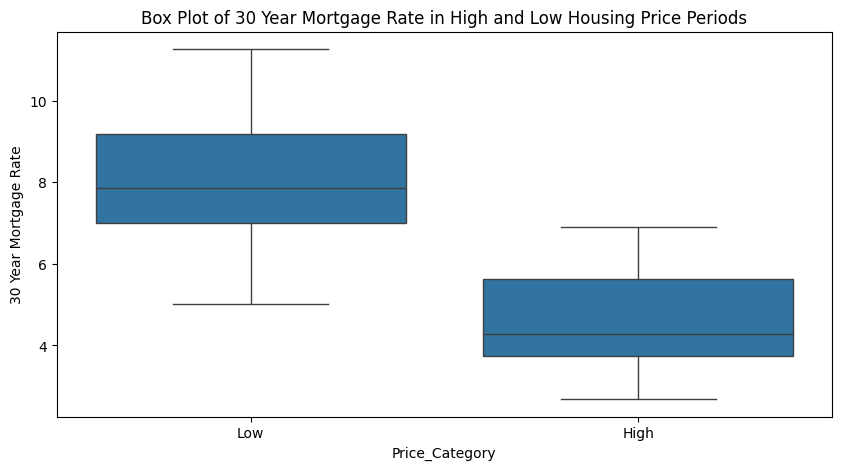

In [ ]:
# Define high and low housing price periods
median_sales_price_median = full_df['MSPUS'].median()
full_df['Price_Category'] = ['High' if x > median_sales_price_median else 'Low' for x in full_df['MSPUS']]

# Perform a t-test between 30 Year Mortgage Rate in high and low housing price periods
high_prices = full_df[full_df['Price_Category'] == 'High']['30 Year Mortgage Rate']
low_prices = full_df[full_df['Price_Category'] == 'Low']['30 Year Mortgage Rate']

t_stat, p_value = stats.ttest_ind(high_prices.dropna(), low_prices.dropna())
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")

# Box plot to visualize the distributions
plt.figure(figsize=(10, 5))
sns.boxplot(x='Price_Category', y='30 Year Mortgage Rate', data=full_df)
plt.title("Box Plot of 30 Year Mortgage Rate in High and Low Housing Price Periods")
plt.show()



## Finding 4: T test and Box plot

**T- Statistic:** The t-statistic measures the difference between the means of the 30 year mortgage rate during high and low housing price periods, with relevance to the variability within each of the groups. -27 is a high value, indicating a significant difference between the 2 groups

**P-value:** The p-value indicates the probability that the observed difference between the means occurred by chance.
Box Plot Visualization: our p value is extremely small indicating that the difference is highly unlikely to be due to chance

The box plot displays the distribution of the 30 Year Mortgage Rate for high and low housing price periods.

High Housing Price Period have The median mortgage rate as being lower, and the interquartile range (IQR) is tighter, indicating less variability and consistently lower rates
.
Low Housing Price Period have the The median mortgage rate as higher, and the IQR is wider, indicating more variability and generally higher rates.

This finding supports the idea that lower mortgage rates are associated with higher housing prices.(GOOD , goes along with our initial findings)

The T -Test analysis shows a statistically significant difference between the 30 Year Mortgage Rate during high and low housing price periods. Specifically:

 **Higher Housing Prices:** Associated with lower 30 Year Mortgage Rates. When mortgage rates are low, borrowing costs decrease, making it cheaper for consumers to finance home purchases. This increased affordability can drive up demand for housing, leading to higher prices.

**Lower Housing Prices:** Associated with higher 30 Year Mortgage Rates. Higher borrowing costs make financing more expensive, reducing affordability for consumers. This can decrease demand for housing, leading to lower prices.
**

Now that we have finished with gathering, processing, and exploring our data. We can move forward with performing our primary analysis. Our primary analysis will be done with machine learning techniques. There are many different machine learning techniques. I decided to go with ridge regression and multiple forest regression. Keep reading to see why.

# Machine Learning

## Preperation

Before we begin the regression analysis, there are a couple important things to discuss.

Q1: What is the dependent variable.

A: At this point in the project we made a crucial realization. We initially thought that we could make a composite index of the three real estate indicators, and carry out a multiple linear regression on this new composite index. This however is not good practice. The 3 indicators would not maintain their statistical integrity.

At this point we decided to shift our projects focus so that we could get better and more conclusive results. Our new goal now was to find out *The impact of economic indicators on the real estate market prices (this time utilizing the case- schiller home price index instead of all 3)*

### From now on real estate market will be based on the case-schiller home price index ONLY

Q2: Colinearity:

 In the earlier inital analysis, we could see that many of the economic indicators followed similar trends in respect to the real estate market. This could cause Colinearity.

What is Collinearity:
This refers to when two or more of our independent variables are highly correlated. If you take a look below, you will be able to see how many of the economic indicators follow an almost exact shape/trend. For example GDP, Inlation rate, and mean family income.  

Why is it bad?
This can cause the machine learning analysis(regression) to almost be impossible to determine the unique contribution of each predictor to the dependent variable. It also shows us redundancy among our independent variables

Read more about its impact on machine learning : https://hackernoon.com/multicollinearity-and-its-importance-in-machine-learning

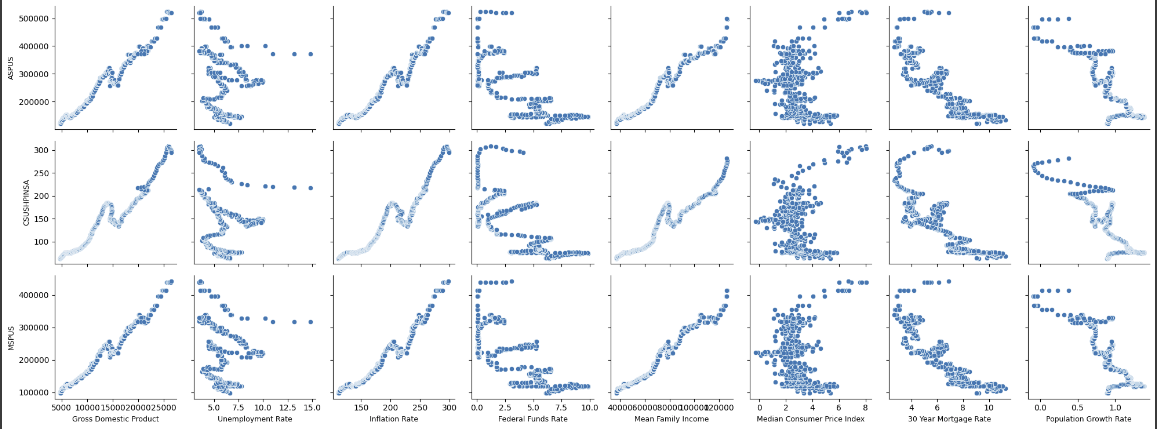

Lets take a look at full correlation matrix to determine which independent variables will demonstrate colinearity.

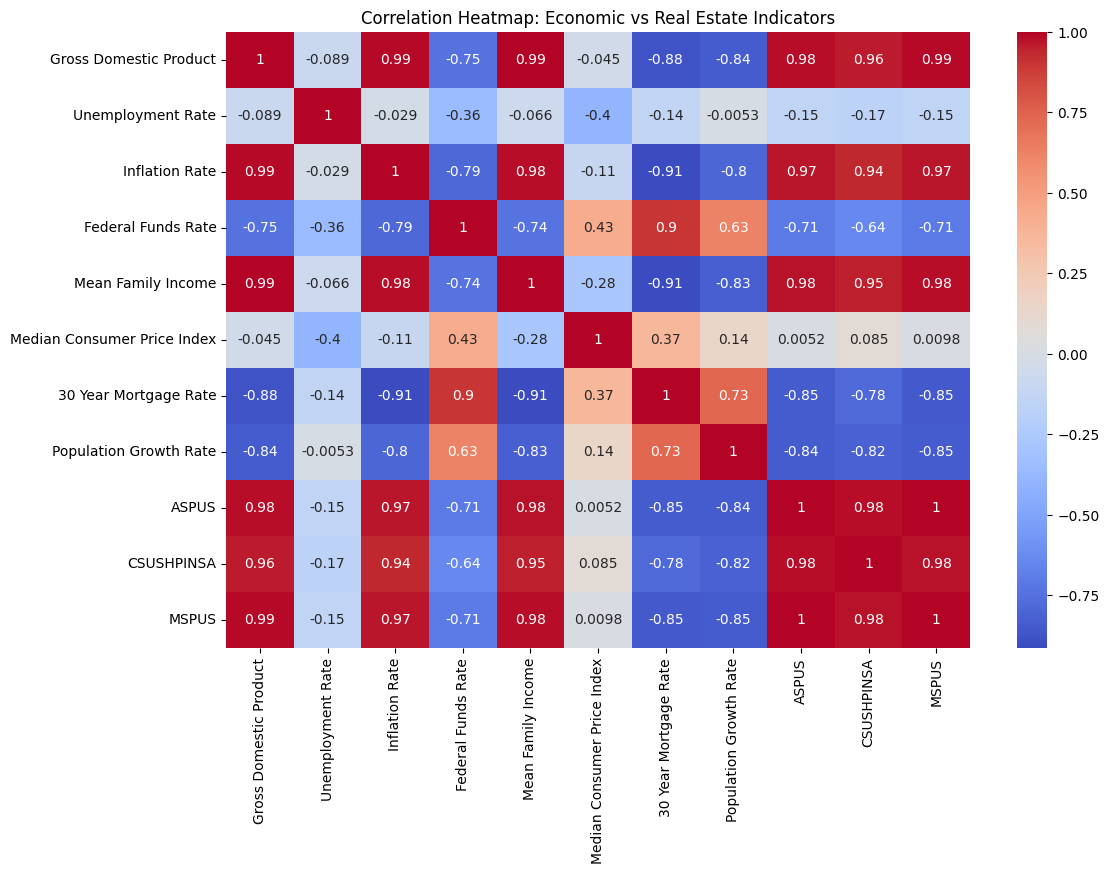

In [ ]:
# Define the lists of economic and real estate indicators
economic_indicators = ['Gross Domestic Product', 'Unemployment Rate', 'Inflation Rate', 'Federal Funds Rate', 'Mean Family Income', 'Median Consumer Price Index', '30 Year Mortgage Rate', 'Population Growth Rate']
real_estate_indicators = ['ASPUS', 'CSUSHPINSA', 'MSPUS']

# Combine the lists to select the relevant columns
selected_columns = economic_indicators + real_estate_indicators

# Assuming full_df is your DataFrame with all the data
# Extract the relevant columns from the DataFrame
selected_df = full_df[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',
            xticklabels=selected_columns, yticklabels=selected_columns)
plt.title('Correlation Heatmap: Economic vs Real Estate Indicators')
plt.show()

Based on the correlation matrix:

GDP, Mean Family Income, and Inflation Rate:
These three variables are highly correlated with each other (correlations close to 0.99). This indicates strong collinearity, which can affect the regression model's stability and interpretation.

Federal Funds Rate, 30 Year Mortgage Rate, and Population Growth Rate:
These variables have strong negative correlations with GDP, Mean Family Income, and Inflation Rate. This may also contribute to multicollinearity issues.


*Q3*. What are our our most important predictors
This is important because this will aid us in making our machine learning analysis less intensive and faster

#Colinearity

Calculate VIF(Variance Inflation Factor) for each variable.

What is VIF: Variance Inflation Factor is a measure that is used to detect multicollinearity in regression models

read more about VIF here : https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=A%20variance%20inflation%20factor%20(VIF)%20is%20a%20measure%20of%20the,adversely%20affect%20the%20regression%20results.

In [ ]:
# Set 1: Positively correlated variables
X_set1 = combined_df[['Gross Domestic Product', 'Mean Family Income', 'Inflation Rate']].dropna() # Drop rows with missing values

# Set 2: Negatively correlated variables
X_set2 = combined_df[['Federal Funds Rate', '30 Year Mortgage Rate', 'Population Growth Rate']].dropna() # Drop rows with missing values

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF for Set 1
vif_data_set1 = calculate_vif(X_set1)
print("VIF for Set 1:")
print(vif_data_set1)

# Calculate VIF for Set 2
vif_data_set2 = calculate_vif(X_set2)
print("VIF for Set 2:")
print(vif_data_set2)

VIF for Set 1:
                 Variable         VIF
0  Gross Domestic Product  159.073891
1      Mean Family Income  486.162415
2          Inflation Rate  152.302410
VIF for Set 2:
                 Variable        VIF
0      Federal Funds Rate   7.237562
1   30 Year Mortgage Rate  39.942124
2  Population Growth Rate  23.944064


At this point we see that vif is greater than 10 for many of the independent variables/economic indicators. This confirms our notion that there is collinearity present.

Now we have two options. To drop variables with high VIF, or to use PCA(what we will be choosing). I want to maintain the value/weight of our variables as our final question is to research the impact of all economic indicators on the real estate market. Dropping wont be our choice

What is PCA:
Principal Component Analysis(PCA): A dimensionality reduction technique. This technique reduces the amount of variables, BUT retains most of the variability(IMPORTANT) of the original dataset.

These are a lot of big words. Wondering what PCA and dimensionality reduction are.... check out the following website : https://builtin.com/data-science/step-step-explanation-principal-component-analysis#:~:text=Principal%20component%20analysis%2C%20or%20PCA,information%20in%20the%20large%20set.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features before applying PCA
scaler_set1 = StandardScaler()
X_scaled_set1 = scaler_set1.fit_transform(X_set1)

scaler_set2 = StandardScaler()
X_scaled_set2 = scaler_set2.fit_transform(X_set2)

# Apply PCA to Set 1
pca_set1 = PCA(n_components=len(X_set1.columns))
X_pca_set1 = pca_set1.fit_transform(X_scaled_set1)
explained_variance_set1 = pca_set1.explained_variance_ratio_
print(f'Explained Variance Ratio for Set 1: {explained_variance_set1}')

# Apply PCA to Set 2
pca_set2 = PCA(n_components=len(X_set2.columns))
X_pca_set2 = pca_set2.fit_transform(X_scaled_set2)
explained_variance_set2 = pca_set2.explained_variance_ratio_
print(f'Explained Variance Ratio for Set 2: {explained_variance_set2}')

# Transforming the PCA components back to DataFrames
X_pca_df_set1 = pd.DataFrame(X_pca_set1, columns=[f'PC{i+1}' for i in range(X_pca_set1.shape[1])])
X_pca_df_set2 = pd.DataFrame(X_pca_set2, columns=[f'PC{i+1}' for i in range(X_pca_set2.shape[1])])

# Select the number of components that explain the majority of the variance
n_components_set1 = np.argmax(np.cumsum(explained_variance_set1) >= 0.95) + 1
selected_pcs_set1 = X_pca_df_set1.iloc[:, :n_components_set1]

n_components_set2 = np.argmax(np.cumsum(explained_variance_set2) >= 0.95) + 1
selected_pcs_set2 = X_pca_df_set2.iloc[:, :n_components_set2]

# Combine the selected principal components from both sets
selected_pcs = pd.concat([selected_pcs_set1, selected_pcs_set2], axis=1)

# Add the target variable to the PCA-transformed DataFrame
selected_pcs['CSUSHPINSA'] = real_estate_df['CSUSHPINSA']


Explained Variance Ratio for Set 1: [0.99148156 0.00738226 0.00113618]
Explained Variance Ratio for Set 2: [0.83798477 0.13417166 0.02784357]


Now that PCA dimesnionality reduction has been carried out we can recalculate VIF, to see if collinearity has been addressed

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Combine the selected principal components from both sets
selected_pcs = pd.concat([selected_pcs_set1, selected_pcs_set2], axis=1)

# Add the target variable to the PCA-transformed DataFrame
selected_pcs['CSUSHPINSA'] = real_estate_df['CSUSHPINSA']

# Function to calculate VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Calculate VIF for the selected principal components
vif_data_pca_combined = calculate_vif(selected_pcs.drop(columns=['CSUSHPINSA']))
print("VIF for Combined Principal Components:")
print(vif_data_pca_combined)

VIF for Combined Principal Components:
  Variable       VIF
0      PC1  7.787604
1      PC1  7.712953
2      PC2  1.074651


Success!, these VIF values are all below 10. This means that we now have acceptable levels of collinearity, and we can move on with our regression analysis

#Regression analysis

Our first machine learning technique will be a form of regression analysis. The specific model we have chosen is ridge regression(A.K.A the Tikhonov regularization). In simple terms Ridge regression is a form of linear regression (the common baseline for machine learnign analysis), but with one addition. Ridge regression handles the issue of multicollinearity with a with a regularization algorithm

Check out the following website, to learn the theory and the math behind ridge regression (It's pretty interesting) https://www.ibm.com/topics/ridge-regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(selected_pcs.drop(columns=['CSUSHPINSA']), selected_pcs['CSUSHPINSA'], test_size=0.2, random_state=42)

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge.predict(X_test)

# Calculate RMSE and R-squared
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

# Get the coefficients of the principal components
coefficients = ridge.coef_

# Create a DataFrame to display the principal components and their coefficients
coefficients_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(coefficients))],
    'Coefficient': coefficients
})

print(coefficients_df)

RMSE: 12.547010479700429
R-squared: 0.955269754728585
  Principal Component  Coefficient
0                 PC1    32.082670
1                 PC2    -4.931618
2                 PC3     6.828343


Interpretation of our results:   
RSME(12.55) - The RMSE(Root Mean Squared Error) is the standard deviation of the (prediction errors). This represents to us the average distance between the predicted values and the actual values of the Case-Shiller index. In our case a lower RMSE indicates a better fit. Our RMSE of 12.55 means that on average the models predictions of the Case-Shiller index were 12.55 units off. As this is relatively low this indicates that this a reasonable accurate prediction. (We can aim to get this number down)

R-squared(0.955) - The R squared value measures the proportion of variance in the dependent variable that we can predict from the independent variables/economic indicators. In this case values closer to 1 explain more variance.
Our r squared value means that 95.5% of the variance in the Case-Shiller index is explained by the principal components that we derived from the economic indicators above. All in all, this is a very good fit, and suggest that the economic indicators are highly predictive of the Case-Shiller index

PC1(Coefficiant: 32.08)
**Impact** GDP, Mean Family income, and inflation rate have a strong impact on the real estate market
PC1, explains the majority of the variance. The large positive coefficiant tells us that the three underlying economic indicators(GDP, Mean Family income, and inflation rate), have a highly significant positive influence on the Case-Shiller index( influence the real estate market to go up)

PC2(Coefficient: -4.93):
**Impact**: Federal Funds rate, 30 year mortgage rate, and population gtowth rate have a moderate negative impact on the real estate market
PC2, has less variance than PC1, but it is still a notable effect. The fact that there is a negative coefficiant indicates to us that the economic indicators contributing to PC2 have an inverse relationship with the real estate market. A higher value in Federal Funds rate, 30 year mortgage rate, and population gtowth rate  associates with lower housing prices

Lets visualize our results

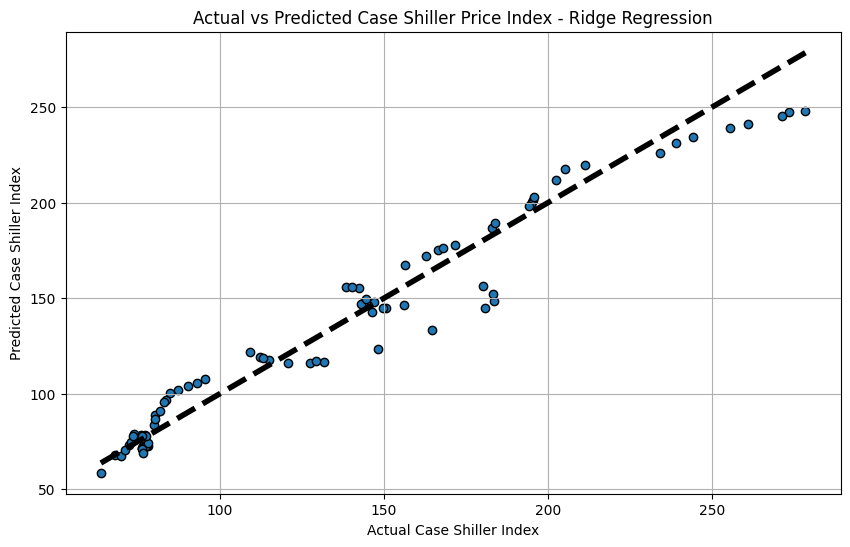

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Case Shiller Index')
plt.ylabel('Predicted Case Shiller Index')
plt.title('Actual vs Predicted Case Shiller Price Index - Ridge Regression')
plt.grid(True)
plt.show()

We can see from this that our predicted values for the real estate market are pretty close, with a few areas of high variance

Lets plot a prediction error graph to better visualize the significance and the severity of the presence of outliers

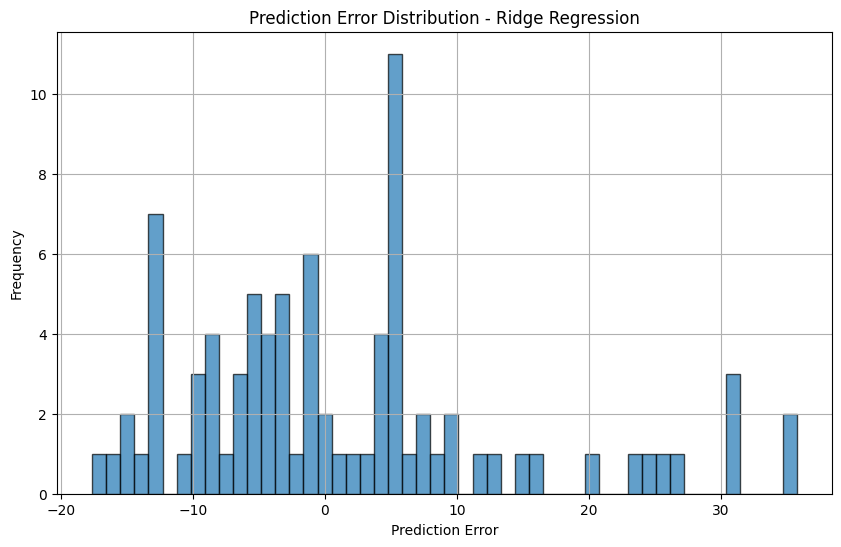

In [ ]:
# Plot distribution of prediction errors
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution - Ridge Regression')
plt.grid(True)
plt.show()


From this prediction error graph, we are able to see that while most errors are close to zero, there are some outliers exceeding 20 and even up to 30. Showing that this model predicts and performs well for most data but there are certain points where it struggles to make accurate predictions.

Our first analysis wasnt bad, but with our predicitions being 12 points off and the presence of high residual outliers as seen in the graph above I think we can get those figures down.

One observation to made is that ridge regression was a form of linear regression which is still a baseline model. It tunes its results and trains its learning method by assuming a linear relationship.

To aim to get our figures from the initial test down, lets try and now use a model that doesnt function off a linear relationship.

We will be trying Multiple Forest(Random Forest Regression).

## Random Forest Regression
  

In our analysis, we initially employed Ridge Linear Regression to model the relationship between economic indicators and real estate prices. Ridge Regression was chosen for its ability to handle multicollinearity and reduce overfitting through regularization. However, our exploratory data analysis suggested the presence of complex, non-linear interactions among the variables, which a linear model might not fully capture.

To address this, we transitioned to Multiple Forest Regression, which is better suited for modeling non-linear relationships. Random Forest Regression aggregates multiple decision trees to improve predictive accuracy and robustness. This method provided significantly higher accuracy in our predictions, confirming the presence of non-linear patterns that Ridge Regression could not adequately model. Moreover, Random Forest offered insights into the importance of various features, enhancing our understanding of the key drivers in the dataset.


Learn more about this powerful Machine Learning model: https://www.ibm.com/topics/random-forest

![random-forest.w


nn       )

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Evaluate the model
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RMSE (Random Forest): {rmse_rf}')
print(f'R-squared (Random Forest): {r2_rf}')


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, min_sa

Much better results!
With an RMSE of 2.02, we are saying that on average our Case Shiller index price predictions using the most important economic indicators are only 2 index points off from the actual values. This is a huge improvement from the linear style regression model.

Our R-squared values also yielded a result of 99.8%. This indicates that the variance in the dependent variable is predictable from the indpenedent variables to a degree of almost 99.8%

This suggests that we have an excellent fit of the model to the data.

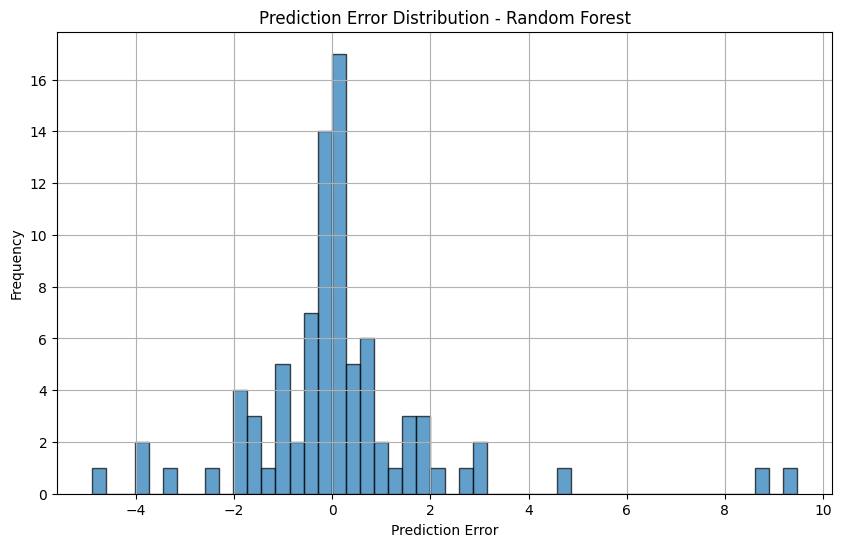

In [ ]:
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Prediction Error Distribution - Random Forest')
plt.grid(True)
plt.show()

The Random Forest model's error distribution is tighter and more centered around zero than the Ridge Regression model, indicating better performance.We have also eliminated any drastic outliers with none exceeding 10.
The Random Forest model may be better suited for this particular dataset and prediction task.

Now to inspect and see which indicators had the greatest impact on the real estate market

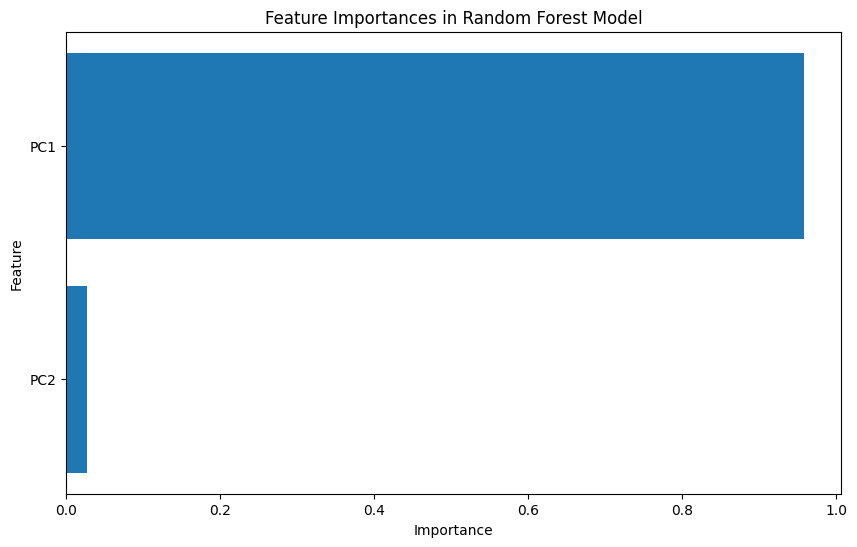

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the best model
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()
plt.show()


From this we are able to see that the components that were part of PC1 carry the most importance on the real estate market( GDP, Mean Family Income, and Inflation rate.

PC2 also does have an impact but far less significant and shares an inverse relationship

Lets perform cross-validation to ensure that the random forest model would be consistent if provided with new or different subsets of data

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = (-cv_scores) ** 0.5

print(f'Cross-validated RMSE: {cv_rmse_scores.mean()} ± {cv_rmse_scores.std()}')


Cross-validated RMSE: 3.8793712729709555 ± 1.9143292208555176


Cross-Validated RMSE (Root Mean Squared Error): 3.88

Interpretation: On average, across different folds of the data, the RMSE is 3.88. This means that the model's predictions are, on average, 3.88 index points off from the actual values of the Case-Shiller Index.
Comparison: This is slightly higher than the RMSE obtained from the initial train-test split (2.03), but still significantly better than the original Ridge Regression model's RMSE (12.55).
Standard Deviation: ±1.91

Interpretation: The standard deviation of 1.91 indicates the variability of the RMSE across different folds. A lower standard deviation means that the model's performance is consistent across different subsets of the data.
Context: A standard deviation of 1.91 is relatively small compared to the mean RMSE, indicating that while there is some variability, the model's performance is fairly stable across different folds.

Implications
Model Robustness: The cross-validation results suggest that the Random Forest model is robust and performs consistently well on different subsets of the data.
Generalization: The model is likely to generalize well to new, unseen data, as indicated by the relatively low cross-validated RMSE and the small standard deviation.


RMSE RMSE RMSE... Now below is a final plot to view what we meant by RMSE values, and when we claimed that our predicted values were only ~2 units off from the actual values, this plot does a great job at showing not only the accuracy of our model but also the relevance and correlation that our economic indicators really have on the real estate market

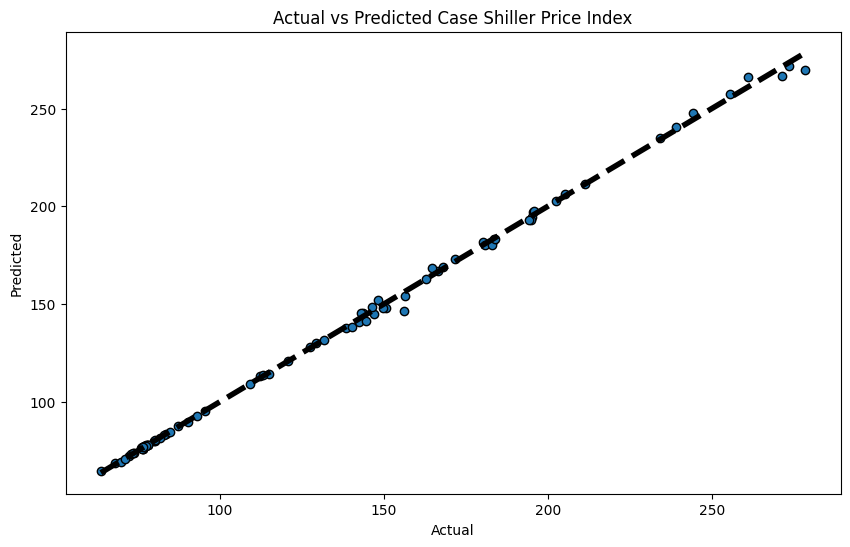

In [ ]:
# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Case Shiller Price Index')
plt.show()



# Insights and conclusions

This is the final part of the Data Science pipeline . Here we will try to draw conclusions and further analysis from our data.

If you have been following along so far there a couple of things which are apperant

1. 6 economic indicators stood out above the rest.
 - GDP
 - Inflation Rate
 - Mean Family income rate
 - 30 Year Mortgage rate
 - Federal Funds rate
 - Population Growth rate

 2. These 6 economic indicators are capable of accounting for 99.8% of the variance in the Real Esate Market(Case Shiller Index). Our model captured almost all the variability in housing prices with these predictors

 3. These 6 economic indicators are capable of predicting the values of the case shiller index over time in the USA by a margin of on average only 2.02 index points off.

 4. Looking deeper into the "6 economic indicators" there are 3 indicators which stood out above the rest. As seen in our feature importance graph that we performed after our last machine learning model
   - The indicators that were part of PCA set 1 carried a very high significance in the random forest prediction model
   - Values part of PCA set 1: GDP, Mean Family Income Rate

So to answer our initial questions.


**How much do Economic indicators really impact the Real Estate Market?**
  Economic Indicators have a very large impact on the real estate market. As seen through our R^2 value of 99.8%. In our case it was a statistical measure that represents the proportion of the variance in the dependent variable (in this case, the Case-Shiller Index, a measure of housing prices) that is explained by the independent variables (the economic indicators: GDP, Inflation Rate, Mean Family Income Rate, 30 Year Mortgage Rate, Federal Funds Rate, and Population Growth Rate).

Our value of 99.8% means that 99.8% of the variability in the Real Estate Market(Case Shiller index) can be explained by the economic indicators.

**Which Economic indicators have the most significant impact on the Real Estate Market ?**

The answer to this question is that out of the 8 economic indicators that we looked at. The U.S GDP( Gross Domestic Product), Mean Family Income, and Inflation rate had the highest and most significant impact on the Real estate market. Seen through our random forest prediction model


# Future Steps

For an analysis like this on something so vast and varied like the real estate market, there are a lot of places to go from here.

seeing as we had already performed cross validation on our model, our next step would be to train the model to predict real estate market values for upcoming years.

Predicting Future Real Estate Market Values:

Next Step: Utilize the trained model to predict real estate market values for upcoming years. This can provide valuable foresight for stakeholders, allowing them to anticipate market trends and make informed decisions.

Limitation: Predicting future values accurately requires high-quality, up-to-date data.This was my limitation for this project. The availability and accuracy of future economic indicator data can be uncertain, and assumptions made about future conditions may not always hold true.

# Final Thoughts

This project was meant to show you the process of data processing, and the thought process that a data scienctist should have while analyzing and working with his/her data. from data processing ➡ Exploratory Data Analysis ➡ hypothesis testing ➡ ML and analysis I hope I have given you some insight into how you can leverage data.